## Setting Environment

In [1]:
import pandas as pd
import numpy as np

## Importing Data

In [2]:
%%time
info_content_df = pd.read_csv('../data/interim/Info_Content.csv', index_col='ucid')
info_userdata_df = pd.read_csv('../data/interim/Info_UserData.csv', index_col='uuid')
log_problem_df = pd.read_csv('../data/interim/Log_Problem.csv', index_col='upid')

Wall time: 16.4 s


## Merging Dataframe

In [3]:
merge_df = log_problem_df.merge(info_userdata_df,how='left',on='uuid')

In [4]:
merge_df = merge_df.merge(info_content_df,how='left',on='ucid')

In [5]:
# preview merge data
merge_df.head()

,datetime_attempt,uuid,ucid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,...,user_city_phc,user_city_ptc,user_city_tc,user_city_tn,user_city_tp,user_city_ttct,user_city_ty,content_pretty_name,difficulty,learning_stage
0,2018-09-28 20:00:00+00:00,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,2,1,True,11,1,0,False,...,0,0,0,0,0,0,0,【基礎】倍數的應用,1,1
1,2018-09-28 10:15:00+00:00,0+VU/Zb0Q96uoByuRhl7r9bJuJO6CKWpsmNMEuijSzc=,/d39FzqaM3PZzpoMXxA80PMICsVhzfL6MGSCqZtsQOo=,6,1,True,26,1,0,False,...,0,0,0,0,0,0,0,【基礎】找出最小公倍數,1,1
2,2018-09-05 20:00:00+00:00,g8DnYvIqpolw10XlwWeIWv6NbDPByUbmgH8EshJqBns=,YuGOmB+frbM8rfAa0RJE882R+IoMf9N89OiVqLbAHBw=,4,1,True,78,1,0,False,...,0,0,0,0,0,0,1,【基礎】尋找質因數,1,1
3,2018-09-14 16:30:00+00:00,kSyUTFlepsYUD723IPL/jEZ520xaKbscrBmNtBUFR1o=,BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,3,1,True,7,1,0,False,...,0,0,0,0,0,0,0,【基礎】數的相關名詞介紹,1,2
4,2018-09-13 16:00:00+00:00,XMFbFA7C49+LRhUddhelfPpA6F5dbOoxeyL3eYbuTlY=,qPHR8aBqOhKij9IS/Y8IR8prwWruoDBGU1tVUhXDJkE=,12,1,True,48,1,0,False,...,0,0,0,0,0,0,1,【基礎】大數的加減,1,1


## Create Proficiency

In [6]:
log_problem_df.level[log_problem_df['level']<4]

upid
ZmKEZ0F2WFqhlL7KFfJcHEnZCZu0e4p+CVG5rSlyKYk=    0
tO9dyvadKWMVQgEx/BXtRIYJ2TRJFQgwvcsBwFb4+xI=    0
6Lxz6aXvgyw3vZd3v8g6jgoCRDPOQzVPx/dnEC0o7DQ=    0
1fIjdakTApQp5PfWog87uOmM6JuoNE/oQq2y5/fMmfw=    0
8V/NT6M+er2I3V3ZIWRNo4Qbo3Iad89PHbeeZeoZeF0=    1
                                               ..
YW9ic0LNvF8VT64lGCeXV+8LW0yfZk6G+FWUs3BZOK4=    1
E5ptHhadL0CWGKIWrolM5Ovli6khhvp/fu/do/0qUC8=    0
CZGEcAjZmnJWpgcAnwFUFLpAElrIa1GCp6GyTYsPUIA=    0
I87Qgm2jCymIb907izeL0DeZGRkpDetYpPWWKbdDrt8=    0
boVeJmNRnhK2ErAZZ1dNhsQ4uNUTCenC8IIvEdl9XSA=    0
Name: level, Length: 7064114, dtype: int64

In [7]:
def create_proficient_col(row):
    if row['level'] < 4:
        val = 0
    else:
        val = 1
    return val

In [8]:
log_problem_df['is_proficient'] = log_problem_df.apply(create_proficient_col, axis=1)

In [9]:
log_problem_df.head()

,datetime_attempt,uuid,ucid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,is_proficient
upid,,,,,,,,,,,,,,
ZmKEZ0F2WFqhlL7KFfJcHEnZCZu0e4p+CVG5rSlyKYk=,2018-09-28 20:00:00+00:00,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,2,1,True,11,1,0,False,0,0,0,0
tO9dyvadKWMVQgEx/BXtRIYJ2TRJFQgwvcsBwFb4+xI=,2018-09-28 10:15:00+00:00,0+VU/Zb0Q96uoByuRhl7r9bJuJO6CKWpsmNMEuijSzc=,/d39FzqaM3PZzpoMXxA80PMICsVhzfL6MGSCqZtsQOo=,6,1,True,26,1,0,False,0,0,0,0
6Lxz6aXvgyw3vZd3v8g6jgoCRDPOQzVPx/dnEC0o7DQ=,2018-09-05 20:00:00+00:00,g8DnYvIqpolw10XlwWeIWv6NbDPByUbmgH8EshJqBns=,YuGOmB+frbM8rfAa0RJE882R+IoMf9N89OiVqLbAHBw=,4,1,True,78,1,0,False,0,0,0,0
1fIjdakTApQp5PfWog87uOmM6JuoNE/oQq2y5/fMmfw=,2018-09-14 16:30:00+00:00,kSyUTFlepsYUD723IPL/jEZ520xaKbscrBmNtBUFR1o=,BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,3,1,True,7,1,0,False,0,0,0,0
8V/NT6M+er2I3V3ZIWRNo4Qbo3Iad89PHbeeZeoZeF0=,2018-09-13 16:00:00+00:00,XMFbFA7C49+LRhUddhelfPpA6F5dbOoxeyL3eYbuTlY=,qPHR8aBqOhKij9IS/Y8IR8prwWruoDBGU1tVUhXDJkE=,12,1,True,48,1,0,False,0,1,1,0


In [10]:
log_problem_df.is_proficient.value_counts()

0    7064114
1     133295
Name: is_proficient, dtype: int64

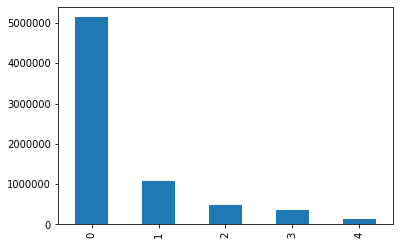

In [11]:
log_problem_df['level'].value_counts().plot.bar()

## Create Content Correct Rate

In [12]:
content_correct = merge_df.groupby('ucid')['is_correct'].apply(lambda x: np.sum(x)/len(x)).reset_index()
content_correct.head()

,ucid,is_correct
0,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,0.481413
1,+IgBffWedJpxG6Zo/kHbrgIRR4jwwTwa6nV03GLwX5A=,0.496226
2,+Lgj0Me9/8gtiruGKq8KxemAD15kU4yCfb6nteNDWjw=,0.676692
3,+N+e7SzcUVowUo7D4udR8rBKRmR1H7yuu5Tleqlhv48=,0.642150
4,+ZVl8HEbTM1GOoCTt2wxAfzQswvAWL3L8e5mLuyy1dY=,0.628628


In [13]:
content_correct.rename(columns={'is_correct': 'content_correct_rate'}, inplace=True)

In [14]:
info_content_df = pd.merge(info_content_df, content_correct, how='left', on=['ucid'])

In [15]:
info_content_df.head()

,ucid,content_pretty_name,difficulty,learning_stage,content_correct_rate
0,odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,1,1,0.670543
1,dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,1,1,0.614334
2,C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,1,1,0.623229
3,jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,1,1,0.684831
4,M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,1,1,0.710526


In [16]:
info_content_df['content_correct_rate'].describe()

count    1315.000000
mean        0.662686
std         0.145005
min         0.000000
25%         0.562178
50%         0.678512
75%         0.767450
max         1.000000
Name: content_correct_rate, dtype: float64

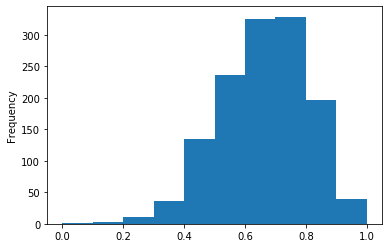

In [17]:
info_content_df['content_correct_rate'].plot.hist()

In [18]:
problem_correct = log_problem_df.groupby(['ucid','problem_number'])['is_correct'].apply(lambda x: np.sum(x)/len(x)).reset_index()
problem_correct.head()

,ucid,problem_number,is_correct
0,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,1,0.561404
1,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,2,0.528302
2,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,3,0.627451
3,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,4,0.521739
4,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,5,0.522727


In [19]:
problem_correct.rename(columns={'is_correct': 'problem_correct_rate'}, inplace=True)

In [20]:
problem_correct['problem_correct_rate']

0         0.561404
1         0.528302
2         0.627451
3         0.521739
4         0.522727
            ...   
105844    1.000000
105845    0.000000
105846    1.000000
105847    1.000000
105848    1.000000
Name: problem_correct_rate, Length: 105849, dtype: float64

In [21]:
log_problem_df = pd.merge(log_problem_df, problem_correct, how='left', on=['ucid','problem_number'])

In [22]:
log_problem_df.head()

,datetime_attempt,uuid,ucid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,is_proficient,problem_correct_rate
0,2018-09-28 20:00:00+00:00,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,2,1,True,11,1,0,False,0,0,0,0,0.619795
1,2018-09-28 10:15:00+00:00,0+VU/Zb0Q96uoByuRhl7r9bJuJO6CKWpsmNMEuijSzc=,/d39FzqaM3PZzpoMXxA80PMICsVhzfL6MGSCqZtsQOo=,6,1,True,26,1,0,False,0,0,0,0,0.712617
2,2018-09-05 20:00:00+00:00,g8DnYvIqpolw10XlwWeIWv6NbDPByUbmgH8EshJqBns=,YuGOmB+frbM8rfAa0RJE882R+IoMf9N89OiVqLbAHBw=,4,1,True,78,1,0,False,0,0,0,0,0.856749
3,2018-09-14 16:30:00+00:00,kSyUTFlepsYUD723IPL/jEZ520xaKbscrBmNtBUFR1o=,BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,3,1,True,7,1,0,False,0,0,0,0,0.780895
4,2018-09-13 16:00:00+00:00,XMFbFA7C49+LRhUddhelfPpA6F5dbOoxeyL3eYbuTlY=,qPHR8aBqOhKij9IS/Y8IR8prwWruoDBGU1tVUhXDJkE=,12,1,True,48,1,0,False,0,1,1,0,0.737624


In [23]:
log_problem_df['problem_correct_rate'].describe()

count    7.197409e+06
mean     7.202336e-01
std      1.461684e-01
min      0.000000e+00
25%      6.355140e-01
50%      7.360000e-01
75%      8.244898e-01
max      1.000000e+00
Name: problem_correct_rate, dtype: float64

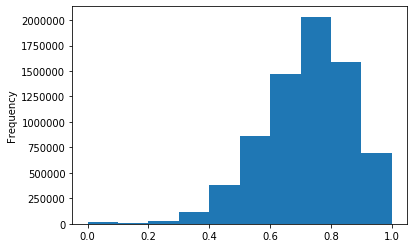

In [24]:
log_problem_df['problem_correct_rate'].plot.hist()

From the histogram above, it shows that the average problem correct rate is at 0.7 which is 70%.

In [25]:
log_problem_df.is_correct[log_problem_df['problem_correct_rate']>0.5].value_counts()

True     4935647
False    1663834
Name: is_correct, dtype: int64

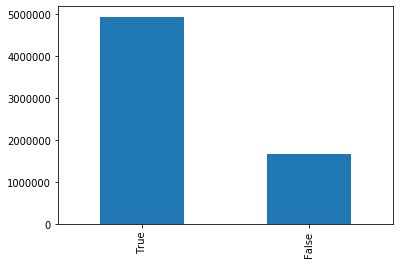

In [26]:
log_problem_df.is_correct[log_problem_df['problem_correct_rate']>0.5].value_counts().plot.bar()

In [27]:
log_problem_df.is_correct[log_problem_df['problem_correct_rate']<0.5].value_counts()

False    326824
True     225234
Name: is_correct, dtype: int64

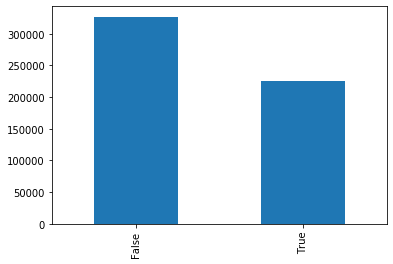

In [28]:
log_problem_df.is_correct[log_problem_df['problem_correct_rate']<0.5].value_counts().plot.bar()

## Exporting Dataframes

In [29]:
info_content_df.to_csv('../data/interim/Info_Content.csv')
info_userdata_df.to_csv('../data/interim/Info_UserData.csv')
log_problem_df.to_csv('../data/interim/Log_Problem.csv')